In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



#lettura del file csv
df = pd.read_csv('E:\Giovanni\Documents\GitHub\Analisi_Dataset\cause_of_deaths.csv')
#visualizzazione delle prime righe del file csv
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Giovanni\AppData\Local\Temp\ipykernel_19820\984072814.py:8: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv('E:\Giovanni\Documents\GitHub\Analisi_Dataset\cause_of_deaths.csv')


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [5]:
df.columns.tolist()


['Country/Territory',
 'Code',
 'Year',
 'Meningitis',
 "Alzheimer's Disease and Other Dementias",
 "Parkinson's Disease",
 'Nutritional Deficiencies',
 'Malaria',
 'Drowning',
 'Interpersonal Violence',
 'Maternal Disorders',
 'HIV/AIDS',
 'Drug Use Disorders',
 'Tuberculosis',
 'Cardiovascular Diseases',
 'Lower Respiratory Infections',
 'Neonatal Disorders',
 'Alcohol Use Disorders',
 'Self-harm',
 'Exposure to Forces of Nature',
 'Diarrheal Diseases',
 'Environmental Heat and Cold Exposure',
 'Neoplasms',
 'Conflict and Terrorism',
 'Diabetes Mellitus',
 'Chronic Kidney Disease',
 'Poisonings',
 'Protein-Energy Malnutrition',
 'Road Injuries',
 'Chronic Respiratory Diseases',
 'Cirrhosis and Other Chronic Liver Diseases',
 'Digestive Diseases',
 'Fire, Heat, and Hot Substances',
 'Acute Hepatitis']

In [6]:
df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

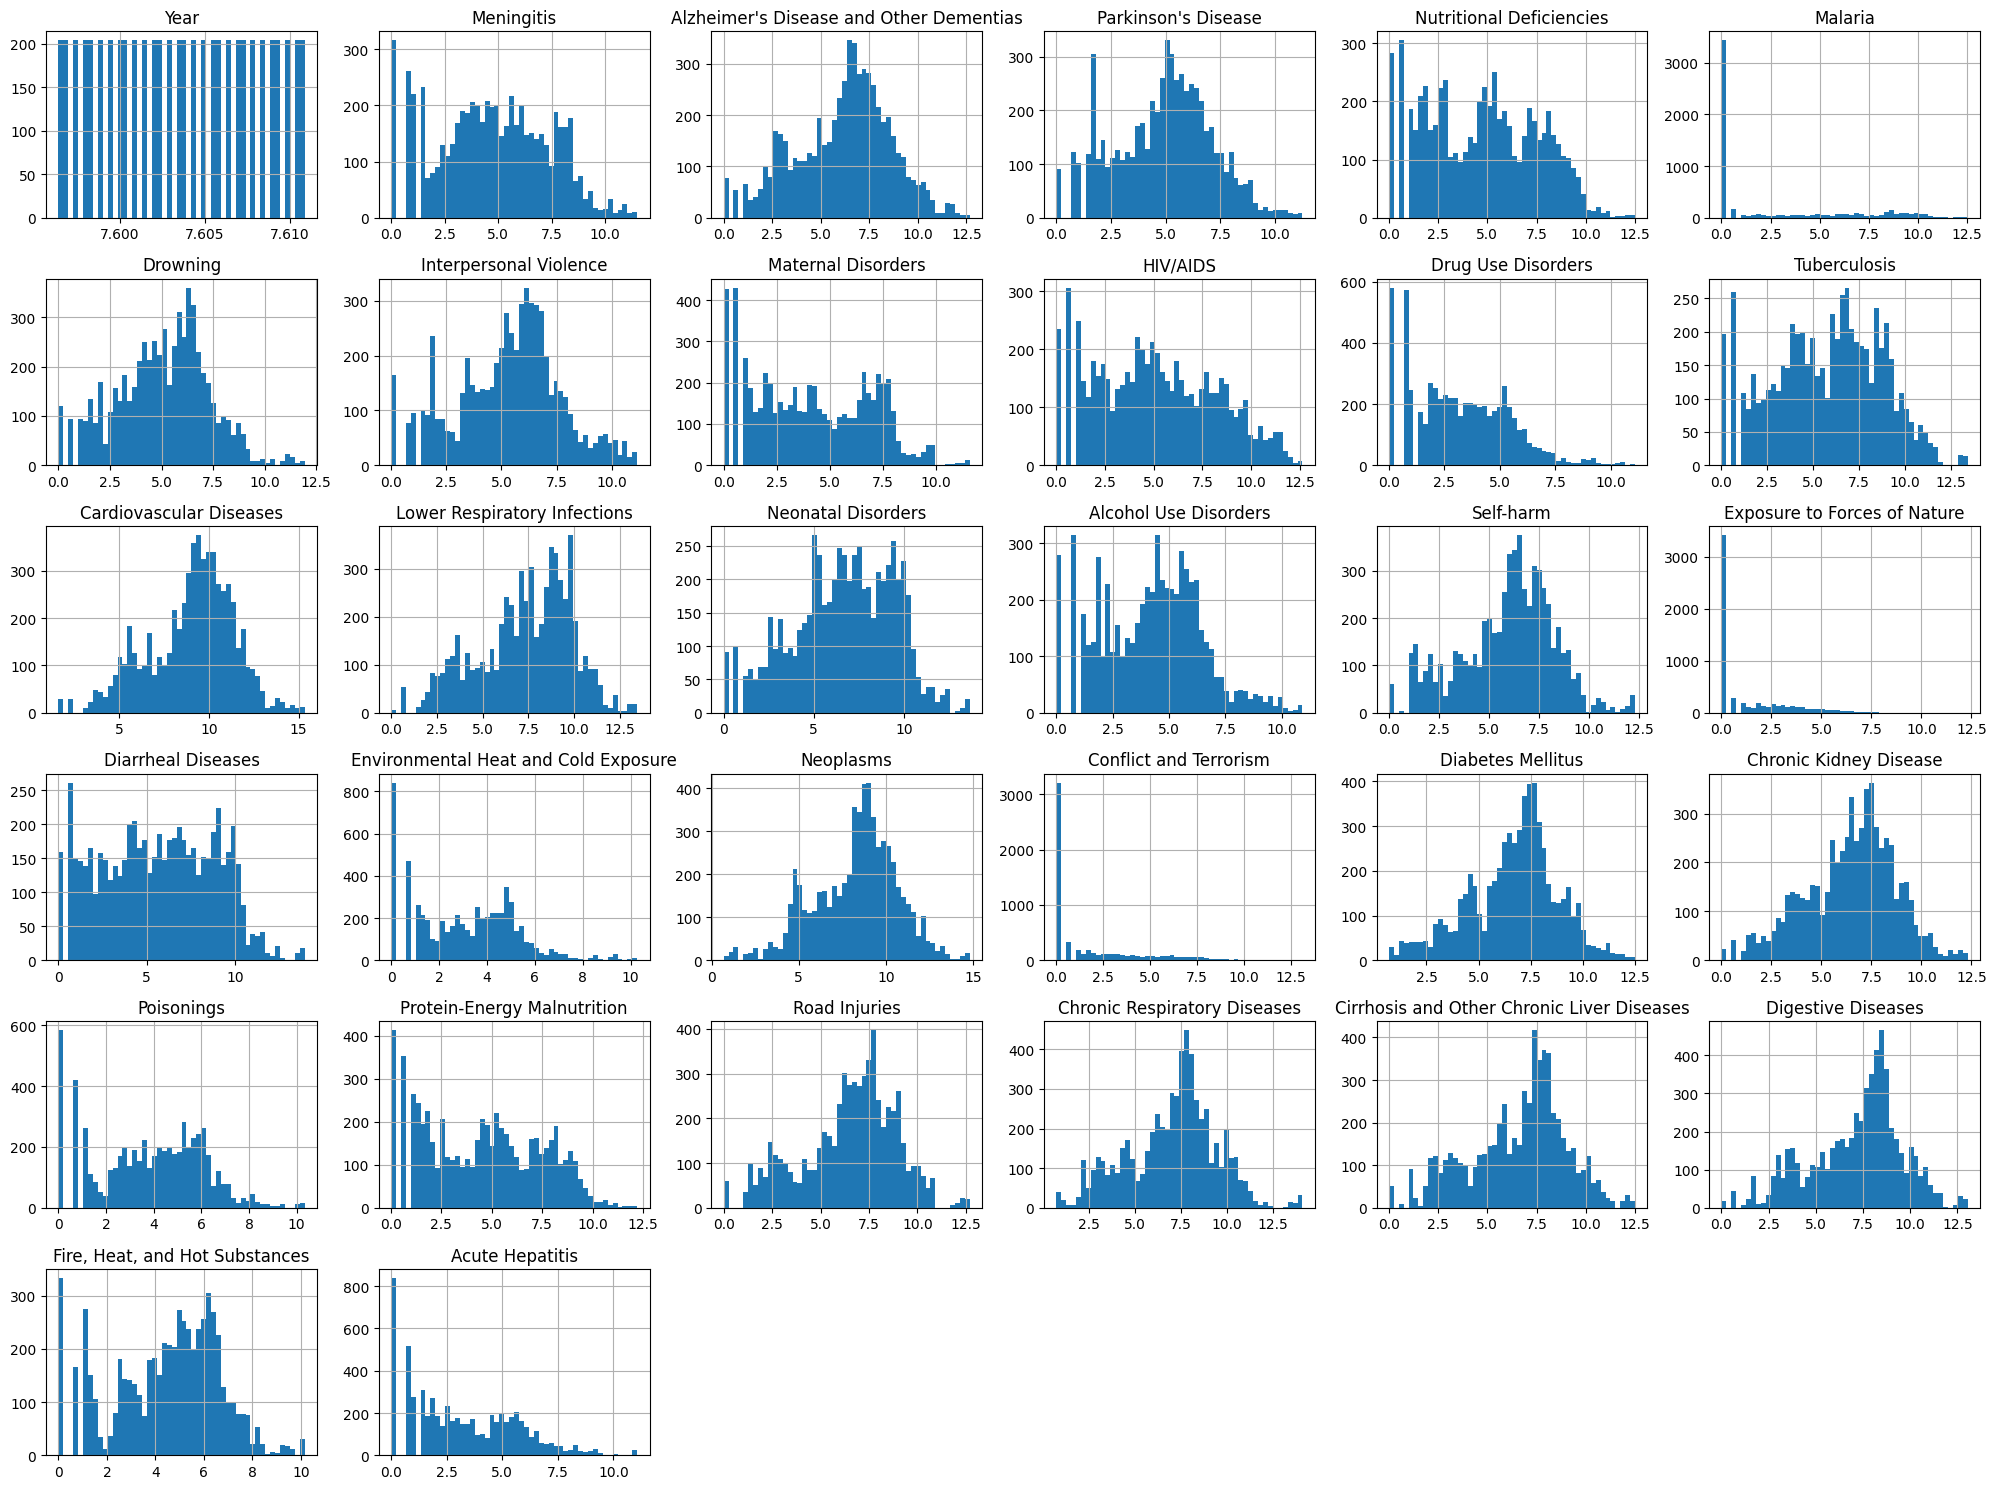

In [37]:
#pulizia dei dati
df_clean = df.copy()
#rimozione delle righe con valori nulli
df_clean = df_clean.dropna()
#rimozione duplicati
df_clean = df_clean.drop_duplicates()
#applica la trasformazione logaritmica solo alle feature numeriche
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_log = df_clean.copy()
df_log[num_cols] = np.log1p(df_clean[num_cols])

df_log.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [38]:
# Campionamento stratificato basato sulla colonna 'Country/Territory'
stratified_sample = df_log.groupby('Country/Territory', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

# Visualizzazione del campione stratificato
stratified_sample.head()

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_19820\1891756744.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df_log.groupby('Country/Territory', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
27,Afghanistan,AFG,7.609862,7.418181,7.455298,6.287859,7.221105,5.991465,7.452402,8.554874,...,8.411388,8.597851,6.240276,7.195187,8.988945,8.851234,8.214465,8.830835,6.167516,7.624131
15,Afghanistan,AFG,7.603898,8.083020,7.217443,6.093570,7.965546,6.302619,7.747597,8.162516,...,8.029759,8.396606,6.293419,7.946264,8.933005,8.908154,8.128290,8.784009,6.230481,8.341649
23,Afghanistan,AFG,7.607878,7.732808,7.366445,6.198479,7.433075,4.969813,7.483244,8.384804,...,8.250098,8.506334,6.204558,7.409742,8.994048,8.833463,8.135640,8.776013,6.133398,7.698483
57,Albania,ALB,7.609862,2.639057,6.739337,5.463832,1.791759,0.000000,3.663562,4.110874,...,5.117994,5.752573,2.564949,1.609438,5.529429,6.659294,5.789960,6.246107,2.944439,0.693147
45,Albania,ALB,7.603898,3.433987,6.244167,5.010635,2.079442,0.000000,3.988984,4.532599,...,5.056246,5.533389,2.708050,1.945910,5.624018,6.517671,5.590987,6.073045,2.890372,0.693147


In [58]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

have_duplicate_rows = df_log.duplicated().any()
have_duplicate_rows


Number of rows: 6120
Number of columns: 34


np.False_

In [62]:
missing_ratio = df_log.select_dtypes(include=['float64','int64']).isnull().sum()
missing_ratio = missing_ratio / num_rows
columns=list(missing_ratio.index)
values=list(missing_ratio.values)
missing_ratio_df={columns[i]:values[i] for i in range(len(columns))}
missing_ratio_df['']=['missing_ratio']
missing_ratio_df=pd.DataFrame(missing_ratio_df).set_index('')
numeric_info_df=df_log.describe()

In [63]:
numeric_info_df=pd.concat([missing_ratio_df,numeric_info_df],axis=0)
numeric_info_df.style.set_properties(**{"background-color": "#254441","color":"#e9c46a","border": "1.5px solid black"})

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000
mean,7.603639,4.702019,6.156339,4.904903,4.699504,2.750421,5.048855,5.305203,4.165487,5.089774,3.227366,5.712067,9.022333,7.342553,6.650322,4.172450,5.937490,1.379362,5.648284,3.059116,8.280273,1.827693,6.686083,6.461145,3.760488,4.460016,6.505237,7.039994,6.574582,7.170845,4.440375,3.177764
std,0.004316,2.631130,2.448569,2.216654,2.805711,3.746402,2.217930,2.370533,2.712368,3.073796,2.179956,2.940701,2.394514,2.527018,2.789632,2.266950,2.338949,1.989800,3.132713,2.132192,2.387930,2.581136,2.138893,2.237247,2.282460,2.895200,2.428008,2.416819,2.439908,2.426909,2.218029,2.423163
min,7.596392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
25%,7.599902,2.772589,4.510860,3.332205,2.302585,0.000000,3.555348,3.713572,1.791759,2.484907,1.386294,3.583519,7.615298,5.846439,4.882802,2.302585,4.553877,0.000000,3.044522,1.098612,6.697960,0.000000,5.468060,4.988726,1.945910,1.791759,5.169059,5.669881,5.043425,5.652489,2.890372,1.098612
50%,7.603649,4.700480,6.503539,5.105945,4.787492,0.000000,5.181784,5.583496,4.007333,4.919981,3.044522,6.035481,9.371012,7.662703,6.821107,4.394449,6.280396,0.000000,5.695413,3.091042,8.635953,0.000000,6.992096,6.712956,3.979638,4.532599,6.874715,7.432483,7.099202,7.689829,4.844187,2.772589
75%,7.607381,6.743175,7.806798,6.413868,7.063262,5.976351,6.549651,6.777647,6.599870,7.539027,4.867534,7.981135,10.658376,9.226434,8.912035,5.758902,7.540754,2.564949,8.280901,4.700480,9.910898,3.178054,7.991254,7.980537,5.541264,6.950335,8.142136,8.566126,8.174209,8.712924,6.111467,5.081404
max,7.610853,11.496379,12.678311,11.251444,12.499578,12.544703,11.943239,11.151109,11.589238,12.629679,11.093128,13.396224,15.338142,13.445771,13.656236,10.918736,12.303009,12.313320,13.928373,10.276739,14.814874,13.129405,12.517557,12.314582,10.337994,12.217220,12.704536,14.127427,12.506318,13.049610,10.161110,11.071408


In [64]:
categorical_df=df.select_dtypes(exclude=['int64'])
col_names=list(categorical_df.columns)
titles=["missing_ratio", "num_values", "value_ratios"]
values_list=[]
dic={}
for i in col_names:
    df1=categorical_df.copy()[[i]]
    size=len(df)
    new=list(df[i].values)
    df[i]=new
    temp=[]
    temp.append(((df[i].isnull().sum()/size)*100).round(3))
    df1.dropna(inplace=True)
    vals=list(df[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    temp2={}
    new=[(df1[i].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    temp2={num_vals[j]:new[j] for j in range(len(num_vals))}
    temp2_sort={k:v for k,v in sorted(temp2.items(), key= lambda item:item[1], reverse=True)}
    temp.append(temp2_sort)
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df.style.set_properties(**{"background-color": "#254441","color":"#e9c46a","border": "1.5px solid black"})

In [65]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#e9edc9","figure.facecolor":"#e9edc9"})
sns.set_context("poster",font_scale = .7)

palette = ["#003C30","#01665E","#35978F","#80CDC1","#80CDC1","#F5F5F5","#e9c46a","#DFC27D","#BF812D","#8C510A","#543005"]
palette_cmap = ["#DFC27D","#e9c46a","#DA9B47","#00847A","#01665E","#254441"]

In [66]:
print(f'\n There are {len(df_log["Country/Territory"].unique())} country/territory enlisted here.\n')
countries_unique = np.unique(df_log['Country/Territory'])
countries_unique = pd.DataFrame(countries_unique , columns = ['Country/Territory'])
countries_unique.T.style.set_properties(**{"background-color": "#254441","color":"#e9c46a","border": "1.5px solid black"})


 There are 204 country/territory enlisted here.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203
Country/Territory,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Niue,North Korea,North Macedonia,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe


In [67]:
print(f'\n There are {len(df["Year"].unique())} years of statistics in this data set (1990-2019).\n')
countries_unique = np.unique(df['Year'])
countries_unique = pd.DataFrame(countries_unique , columns = ['Year'])
countries_unique.T.style.set_properties(**{"background-color": "#254441","color":"#e9c46a","border": "1.5px solid black"})


 There are 30 years of statistics in this data set (1990-2019).



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


In [68]:
# Define the categories
categories = {
    "Infectious Diseases": [
        "Meningitis", "HIV/AIDS", "Tuberculosis", "Malaria", "Diarrheal Diseases",
        "Lower Respiratory Infections", "Neonatal Disorders", "Acute Hepatitis"
    ],
    "Non-Communicable Diseases": [
        "Alzheimer's Disease and Other Dementias", "Parkinson's Disease", "Cardiovascular Diseases",
        "Diabetes Mellitus", "Chronic Kidney Disease", "Chronic Respiratory Diseases",
        "Cirrhosis and Other Chronic Liver Diseases", "Digestive Diseases", "Neoplasms"
    ],
    "External Causes": [
        "Drowning", "Interpersonal Violence", "Maternal Disorders", "Self-harm",
        "Exposure to Forces of Nature", "Road Injuries", "Fire, Heat, and Hot Substances",
        "Conflict and Terrorism", "Poisonings", "Alcohol Use Disorders", "Drug Use Disorders"
    ]
}

# Assign categories to each cause of death
df_categories = pd.DataFrame([
    {"Cause": cause, "Category": category}
    for category, causes in categories.items()
    for cause in causes
])

# Display the categorized causes of death
df_categories

,Cause,Category
0,Meningitis,Infectious Diseases
1,HIV/AIDS,Infectious Diseases
2,Tuberculosis,Infectious Diseases
3,Malaria,Infectious Diseases
4,Diarrheal Diseases,Infectious Diseases
5,Lower Respiratory Infections,Infectious Diseases
6,Neonatal Disorders,Infectious Diseases
7,Acute Hepatitis,Infectious Diseases
8,Alzheimer's Disease and Other Dementias,Non-Communicable Diseases
9,Parkinson's Disease,Non-Communicable Diseases


In [75]:
print(f'\n There are {len(df["Year"].unique())} years of statistics in this data set (1990-2019).\n')
countries_unique = np.unique(df['Year'])
countries_unique = pd.DataFrame(countries_unique , columns = ['Year'])
countries_unique.T.style.set_properties(**{"background-color": "#254441","color":"#e9c46a","border": "1.5px solid black"})


 There are 30 years of statistics in this data set (1990-2019).



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


In [76]:
communicable_diseases_df = df[["Year", "Nutritional Deficiencies", "Malaria", "Maternal Disorders", "HIV/AIDS","Drug Use Disorders","Tuberculosis","Neonatal Disorders","Alcohol Use Disorders","Diarrheal Diseases"]]

non_communicable_diseases_df = df[["Year", "Meningitis","Alzheimer's Disease and Other Dementias", "Parkinson's Disease", 
"Cardiovascular Diseases","Lower Respiratory Infections", "Acute Hepatitis", "Digestive Diseases", "Cirrhosis and Other Chronic Liver Diseases", 
"Chronic Respiratory Diseases", "Diabetes Mellitus","Chronic Kidney Disease"]]

injures_df = df[["Year","Drowning", "Interpersonal Violence", "Fire, Heat, and Hot Substances", "Road Injuries", "Poisonings" ,
"Protein-Energy Malnutrition", "Conflict and Terrorism", "Self-harm", "Exposure to Forces of Nature", 
"Environmental Heat and Cold Exposure"]]

communicable_diseases_df = df.assign(sumRow = communicable_diseases_df.sum(axis=1) - communicable_diseases_df['Year']) 
sum_by_year_communicable_diseases_df = communicable_diseases_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

non_communicable_diseases_df = non_communicable_diseases_df.assign(sumRow = non_communicable_diseases_df.sum(axis=1) - non_communicable_diseases_df['Year'])
sum_by_year_non_communicable_diseases_df = non_communicable_diseases_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

injures_df = injures_df.assign(sumRow = injures_df.sum(axis=1) - injures_df['Year']) 
sum_by_year_injures_df = injures_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

sum_by_year_df = sum_by_year_communicable_diseases_df.merge(sum_by_year_non_communicable_diseases_df, on='Year').merge(sum_by_year_injures_df,on='Year')
sum_by_year_df.rename(columns={'sumRow_x': 'communicable_diseases', 'sumRow_y': 'non_communicable_diseases', 'sumRow': 'injures'}, inplace=True)

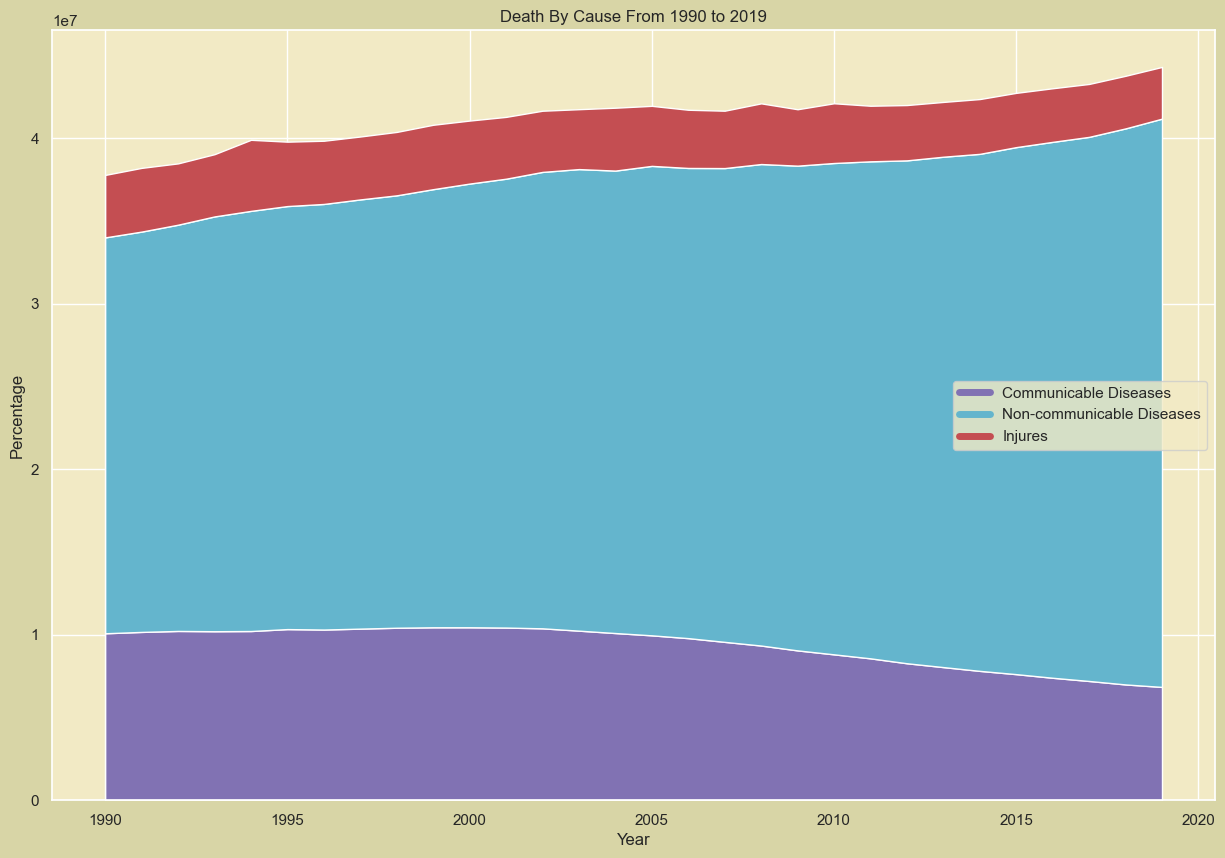

In [77]:
sum_by_year_copy=sum_by_year_df.copy()
total_sum_by_year = sum_by_year_copy.sum(axis = 1) - sum_by_year_copy['Year']
sum_by_year_copy['communicable_diseases'] = (sum_by_year_copy['communicable_diseases']*100/total_sum_by_year).round(2)
sum_by_year_copy['non_communicable_diseases'] = (sum_by_year_copy['non_communicable_diseases']*100/total_sum_by_year).round(2)
sum_by_year_copy['injures'] = 100 - sum_by_year_copy['communicable_diseases'] - sum_by_year_copy['non_communicable_diseases']

plt.rcParams['figure.figsize'] = [15, 10]
 
# Stackplot

plt.plot([],[],color='m', label='Communicable Diseases', linewidth=5)
plt.plot([],[],color='c', label='Non-communicable Diseases', linewidth=5)
plt.plot([],[],color='r', label='Injures', linewidth=5)

plt.stackplot(sum_by_year_df['Year'],
                sum_by_year_df['communicable_diseases'], 
              sum_by_year_df['non_communicable_diseases'], 
              sum_by_year_df['injures'], 
             colors=['m','c','r'])
 
plt.xlabel('Year')
 
plt.ylabel('Percentage')
 
# Title of Graph
plt.title('Death By Cause From 1990 to 2019')
plt.legend(loc='center right')
# Displaying Graph
plt.show()

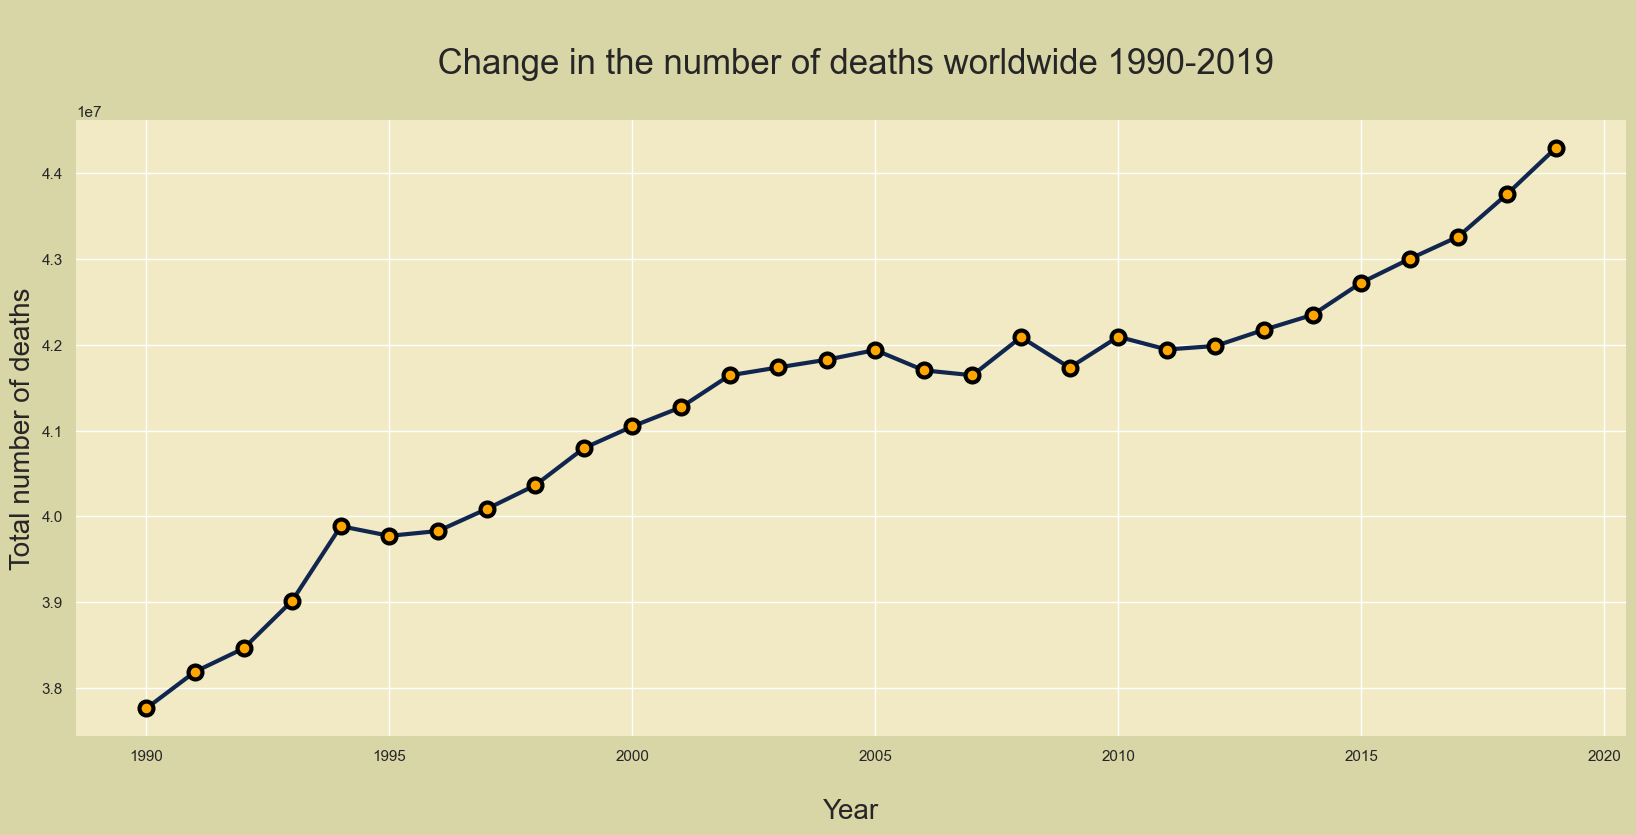

In [78]:
sum_by_year_df["Total"]=sum_by_year_df["communicable_diseases"]+sum_by_year_df["non_communicable_diseases"]+sum_by_year_df["injures"]

sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=sum_by_year_df["Year"] ,y=sum_by_year_df["Total"],data=sum_by_year_df,color="#11264e",marker="o",linewidth=3,markersize=10,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\n Change in the number of deaths worldwide 1990-2019\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total number of deaths",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# set up GridSearchCV with 5‐fold CV
grid_search_xgb = GridSearchCV(
    XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# fit on training data (features X_train already defined)
grid_search_xgb.fit(X_train, y_train_enc)

# best model and performance
print("Best params:", grid_search_xgb.best_params_)
print("Best CV accuracy:", grid_search_xgb.best_score_)

# retrieve best estimator
best_xgb = grid_search_xgb.best_estimator_
# evaluate on test set
y_pred_xgb = best_xgb.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))